In [1]:
import tensorflow

In [3]:
filepath = './BhartiAirtel.csv'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./BhartiAirtel.csv')
df.head()




,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-June-2021,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802.0,398176.0,60.15,4.50,-2.10
1,3-June-2021,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25
2,2-June-2021,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
3,1-June-2021,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
4,31-May-2021,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15


In [6]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2.582000e+03,2582.000000,2.582000e+03,2.581000e+03,2581.000000,2582.000000,2582.000000
mean,377.273528,382.783036,370.990840,376.645488,376.853753,7.091815e+05,6045.009682,3.120107e+08,4.165812e+05,31.093433,11.792196,-0.628040
std,75.045686,76.001058,73.684129,74.668884,74.824475,7.491105e+06,6869.653026,3.858696e+09,6.193051e+06,18.540318,6.917679,7.877328
min,240.500000,244.000000,238.500000,242.300000,240.900507,1.266500e+04,331.000000,3.896124e+06,2.970000e+03,1.270000,1.950000,-36.100000
25%,325.025000,330.000000,320.512500,324.562500,325.264876,1.571900e+05,2594.500000,5.507414e+07,3.132000e+04,17.790000,7.500000,-5.000000
50%,356.150000,361.400000,350.500000,355.450000,355.513351,2.600125e+05,4220.000000,9.375542e+07,6.415000e+04,26.560000,10.050000,-0.800000
75%,404.887500,409.125000,398.100000,403.400000,403.681500,4.642180e+05,7041.500000,1.793796e+08,1.531570e+05,39.490000,13.950000,3.300000
max,618.300000,623.000000,599.550000,608.800000,612.794431,2.795148e+08,162290.000000,1.352817e+11,1.999164e+08,99.460000,92.400000,62.200000


In [7]:
df.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2582 non-null   object 
 1   Open Price                 2582 non-null   float64
 2   High Price                 2582 non-null   float64
 3   Low Price                  2582 non-null   float64
 4   Close Price                2582 non-null   float64
 5   WAP                        2582 non-null   float64
 6   No.of Shares               2582 non-null   int64  
 7   No. of Trades              2582 non-null   int64  
 8   Total Turnover (Rs.)       2582 non-null   float64
 9   Deliverable Quantity       2581 non-null   float64
 10  % Deli. Qty to Traded Qty  2581 non-null   float64
 11  Spread High-Low            2582 non-null   float64
 12  Spread Close-Open          2582 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

<AxesSubplot:>

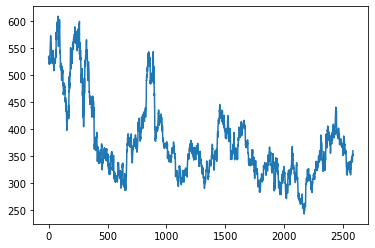

In [9]:
df['Close Price'].plot()

<AxesSubplot:>

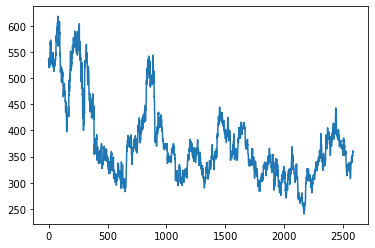

In [10]:
df['Open Price'].plot()

<AxesSubplot:>

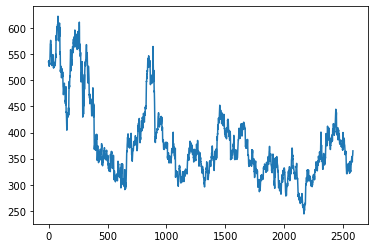

In [11]:
df['High Price'].plot()

<AxesSubplot:>

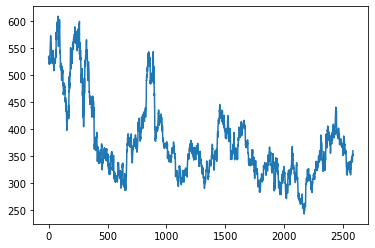

In [12]:
df['Close Price'].plot()

In [13]:
len (df)

2582

In [14]:
airtel_close = df['Close Price']

In [15]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(2582,)

In [16]:
airtel_close=pd.DataFrame(airtel_close)

In [17]:
train=airtel_close.iloc[:480]
test=airtel_close.iloc[480:]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler= MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Creating the model 

In [23]:
test.shape


(2102, 1)

In [24]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [25]:
length = 16
batch_size = 12

generator = TimeseriesGenerator(scaled_train,scaled_train,length = length, batch_size=batch_size)

#will create an object with train - length and last 16 values will be predicted

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout


In [27]:
n_features = 1

In [28]:
model = Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


C:\Users\PARIDH~1\AppData\Local\Temp/ipykernel_13676/3531706309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


39/39 [==============================] - 1s 2ms/step - loss: 0.0765
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0108


In [31]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

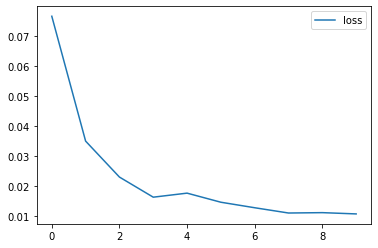

In [32]:
losses.plot()

# Evaluate test set

In [33]:
first_eval_batch = scaled_train[-length:]

#picks last 16 values in train set

In [34]:
first_eval_batch

array([[0.05634544],
       [0.06441987],
       [0.0770581 ],
       [0.09443567],
       [0.09390907],
       [0.11233983],
       [0.1291908 ],
       [0.12076532],
       [0.1342812 ],
       [0.1144462 ],
       [0.14358434],
       [0.13568545],
       [0.10338775],
       [0.10338775],
       [0.08618571],
       [0.0798666 ]])

In [35]:
first_eval_batch= first_eval_batch.reshape((1,length,1))

In [36]:
first_eval_batch

array([[[0.05634544],
        [0.06441987],
        [0.0770581 ],
        [0.09443567],
        [0.09390907],
        [0.11233983],
        [0.1291908 ],
        [0.12076532],
        [0.1342812 ],
        [0.1144462 ],
        [0.14358434],
        [0.13568545],
        [0.10338775],
        [0.10338775],
        [0.08618571],
        [0.0798666 ]]])

In [37]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 114ms/step


array([[0.08179793]], dtype=float32)

In [38]:
scaled_test[0]

array([0.0844304])

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    print('Index', i)
    current_pred = model.predict(current_batch, verbose = False)[0]
    test_predictions.append(current_pred)
    current_batc = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

Index 0
Index 1
Index 2
Index 3
Index 4
Index 5
Index 6
Index 7
Index 8
Index 9
Index 10
Index 11
Index 12
Index 13
Index 14
Index 15
Index 16
Index 17
Index 18
Index 19
Index 20
Index 21
Index 22
Index 23
Index 24
Index 25
Index 26
Index 27
Index 28
Index 29
Index 30
Index 31
Index 32
Index 33
Index 34
Index 35
Index 36
Index 37
Index 38
Index 39
Index 40
Index 41
Index 42
Index 43
Index 44
Index 45
Index 46
Index 47
Index 48
Index 49
Index 50
Index 51
Index 52
Index 53
Index 54
Index 55
Index 56
Index 57
Index 58
Index 59
Index 60
Index 61
Index 62
Index 63
Index 64
Index 65
Index 66
Index 67
Index 68
Index 69
Index 70
Index 71
Index 72
Index 73
Index 74
Index 75
Index 76
Index 77
Index 78
Index 79
Index 80
Index 81
Index 82
Index 83
Index 84
Index 85
Index 86
Index 87
Index 88
Index 89
Index 90
Index 91
Index 92
Index 93
Index 94
Index 95
Index 96
Index 97
Index 98
Index 99
Index 100
Index 101
Index 102
Index 103
Index 104
Index 105
Index 106
Index 107
Index 108
Index 109
Index 110


Index 833
Index 834
Index 835
Index 836
Index 837
Index 838
Index 839
Index 840
Index 841
Index 842
Index 843
Index 844
Index 845
Index 846
Index 847
Index 848
Index 849
Index 850
Index 851
Index 852
Index 853
Index 854
Index 855
Index 856
Index 857
Index 858
Index 859
Index 860
Index 861
Index 862
Index 863
Index 864
Index 865
Index 866
Index 867
Index 868
Index 869
Index 870
Index 871
Index 872
Index 873
Index 874
Index 875
Index 876
Index 877
Index 878
Index 879
Index 880
Index 881
Index 882
Index 883
Index 884
Index 885
Index 886
Index 887
Index 888
Index 889
Index 890
Index 891
Index 892
Index 893
Index 894
Index 895
Index 896
Index 897
Index 898
Index 899
Index 900
Index 901
Index 902
Index 903
Index 904
Index 905
Index 906
Index 907
Index 908
Index 909
Index 910
Index 911
Index 912
Index 913
Index 914
Index 915
Index 916
Index 917
Index 918
Index 919
Index 920
Index 921
Index 922
Index 923
Index 924
Index 925
Index 926
Index 927
Index 928
Index 929
Index 930
Index 931
Index 932


Index 1593
Index 1594
Index 1595
Index 1596
Index 1597
Index 1598
Index 1599
Index 1600
Index 1601
Index 1602
Index 1603
Index 1604
Index 1605
Index 1606
Index 1607
Index 1608
Index 1609
Index 1610
Index 1611
Index 1612
Index 1613
Index 1614
Index 1615
Index 1616
Index 1617
Index 1618
Index 1619
Index 1620
Index 1621
Index 1622
Index 1623
Index 1624
Index 1625
Index 1626
Index 1627
Index 1628
Index 1629
Index 1630
Index 1631
Index 1632
Index 1633
Index 1634
Index 1635
Index 1636
Index 1637
Index 1638
Index 1639
Index 1640
Index 1641
Index 1642
Index 1643
Index 1644
Index 1645
Index 1646
Index 1647
Index 1648
Index 1649
Index 1650
Index 1651
Index 1652
Index 1653
Index 1654
Index 1655
Index 1656
Index 1657
Index 1658
Index 1659
Index 1660
Index 1661
Index 1662
Index 1663
Index 1664
Index 1665
Index 1666
Index 1667
Index 1668
Index 1669
Index 1670
Index 1671
Index 1672
Index 1673
Index 1674
Index 1675
Index 1676
Index 1677
Index 1678
Index 1679
Index 1680
Index 1681
Index 1682
Index 1683

In [40]:

test_predictions

[array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 array([0.08179793], dtype=float32),
 

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)

In [42]:
true_predictions

array([[347.25013968],
       [347.25013968],
       [347.25013968],
       ...,
       [347.25013968],
       [347.25013968],
       [347.25013968]])

In [43]:
test['predictions'] = true_predictions

C:\Users\PARIDH~1\AppData\Local\Temp/ipykernel_13676/349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [44]:
test

,Close Price,predictions
480,348.00,347.25014
481,345.35,347.25014
482,348.45,347.25014
483,344.80,347.25014
484,344.25,347.25014
...,...,...
2577,338.70,347.25014
2578,353.25,347.25014
2579,349.90,347.25014
2580,355.30,347.25014


<AxesSubplot:>

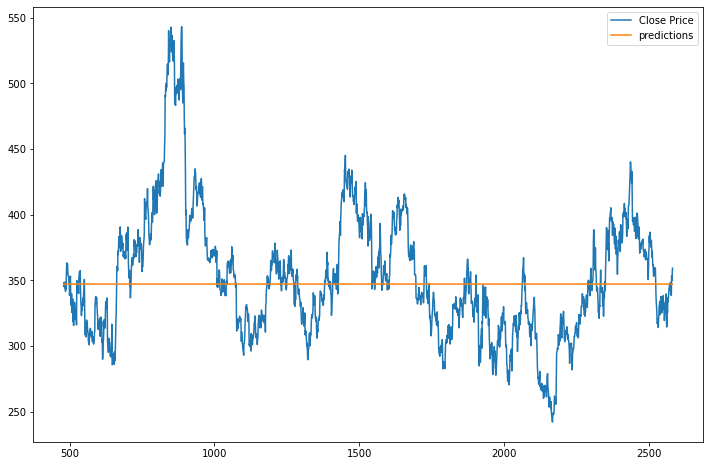

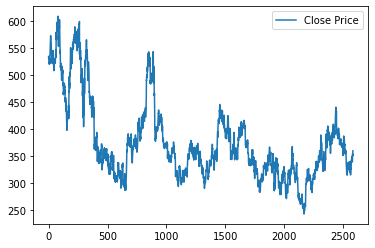

In [45]:
test.plot(figsize=(12,8))
airtel_close.plot()

# Let Us Create Full Model

In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [47]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length, batch_size=32)

In [48]:
model = Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [49]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


C:\Users\PARIDH~1\AppData\Local\Temp/ipykernel_13676/3531706309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


81/81 [==============================] - 1s 2ms/step - loss: 0.0831
Epoch 2/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 3/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 4/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 5/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 6/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 7/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 8/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 9/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 10/10
81/81 [==============================] - 0s 2ms/step - loss: 0.0042


<AxesSubplot:>

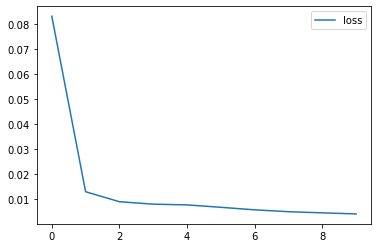

In [50]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [51]:
forecast = []
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
    
    #get predicted 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    forecast.append(current_pred)
    
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [52]:
forecast = scaler.inverse_transform(forecast)

In [53]:
forecast

array([[352.66658981],
       [348.37480051],
       [345.36591269],
       [349.79142586],
       [350.76828986],
       [347.07035346],
       [349.54510348],
       [347.45541258],
       [350.56969159],
       [350.7551783 ],
       [349.83069898],
       [352.38433056],
       [352.130491  ],
       [353.41629579],
       [352.15094146],
       [351.12644461],
       [354.51702771],
       [353.91708168],
       [352.12845784],
       [352.24631753]])

In [54]:
forecast.flatten()

array([352.66658981, 348.37480051, 345.36591269, 349.79142586,
       350.76828986, 347.07035346, 349.54510348, 347.45541258,
       350.56969159, 350.7551783 , 349.83069898, 352.38433056,
       352.130491  , 353.41629579, 352.15094146, 351.12644461,
       354.51702771, 353.91708168, 352.12845784, 352.24631753])

In [55]:
df_array = np.array(airtel_close)
df_array

array([[532.7 ],
       [532.1 ],
       [529.6 ],
       ...,
       [349.9 ],
       [355.3 ],
       [359.35]])

In [56]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

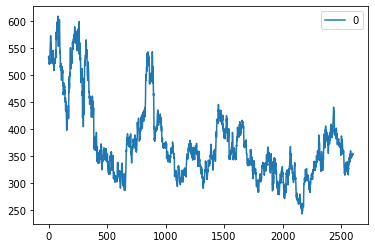

In [57]:
full_data.plot();

# LSTM Model

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [59]:
length

16

In [60]:
scaled_test.shape

(2102, 1)

In [61]:
length = 15
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=32)

In [62]:
model = Sequential()
model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [63]:
model.fit_generator(generator,epochs=20,validation_data = validation_generator,callbacks=[early_stop],shuffle=False)

Epoch 1/20


C:\Users\PARIDH~1\AppData\Local\Temp/ipykernel_13676/287847595.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data = validation_generator,callbacks=[early_stop],shuffle=False)


15/15 [==============================] - 3s 41ms/step - loss: 0.3074 - val_loss: 0.0175
Epoch 2/20
15/15 [==============================] - 0s 14ms/step - loss: 0.1292 - val_loss: 0.0158
Epoch 3/20
15/15 [==============================] - 0s 14ms/step - loss: 0.0312 - val_loss: 0.0314
Epoch 4/20
15/15 [==============================] - 0s 15ms/step - loss: 0.0181 - val_loss: 0.0174


<AxesSubplot:>

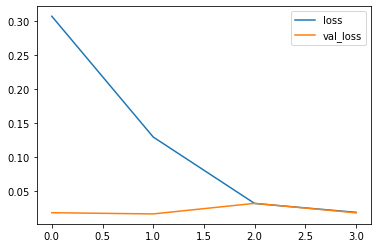

In [64]:
losses= pd.DataFrame(model.history.history)
losses.plot()

In [65]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    print('Index', i)
    current_pred = model.predict(current_batch, verbose = False)[0]
    test_predictions.append(current_pred)
    current_batc = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

Index 0
Index 1
Index 2
Index 3
Index 4
Index 5
Index 6
Index 7
Index 8
Index 9
Index 10
Index 11
Index 12
Index 13
Index 14
Index 15
Index 16
Index 17
Index 18
Index 19
Index 20
Index 21
Index 22
Index 23
Index 24
Index 25
Index 26
Index 27
Index 28
Index 29
Index 30
Index 31
Index 32
Index 33
Index 34
Index 35
Index 36
Index 37
Index 38
Index 39
Index 40
Index 41
Index 42
Index 43
Index 44
Index 45
Index 46
Index 47
Index 48
Index 49
Index 50
Index 51
Index 52
Index 53
Index 54
Index 55
Index 56
Index 57
Index 58
Index 59
Index 60
Index 61
Index 62
Index 63
Index 64
Index 65
Index 66
Index 67
Index 68
Index 69
Index 70
Index 71
Index 72
Index 73
Index 74
Index 75
Index 76
Index 77
Index 78
Index 79
Index 80
Index 81
Index 82
Index 83
Index 84
Index 85
Index 86
Index 87
Index 88
Index 89
Index 90
Index 91
Index 92
Index 93
Index 94
Index 95
Index 96
Index 97
Index 98
Index 99
Index 100
Index 101
Index 102
Index 103
Index 104
Index 105
Index 106
Index 107
Index 108
Index 109
Index 110


Index 836
Index 837
Index 838
Index 839
Index 840
Index 841
Index 842
Index 843
Index 844
Index 845
Index 846
Index 847
Index 848
Index 849
Index 850
Index 851
Index 852
Index 853
Index 854
Index 855
Index 856
Index 857
Index 858
Index 859
Index 860
Index 861
Index 862
Index 863
Index 864
Index 865
Index 866
Index 867
Index 868
Index 869
Index 870
Index 871
Index 872
Index 873
Index 874
Index 875
Index 876
Index 877
Index 878
Index 879
Index 880
Index 881
Index 882
Index 883
Index 884
Index 885
Index 886
Index 887
Index 888
Index 889
Index 890
Index 891
Index 892
Index 893
Index 894
Index 895
Index 896
Index 897
Index 898
Index 899
Index 900
Index 901
Index 902
Index 903
Index 904
Index 905
Index 906
Index 907
Index 908
Index 909
Index 910
Index 911
Index 912
Index 913
Index 914
Index 915
Index 916
Index 917
Index 918
Index 919
Index 920
Index 921
Index 922
Index 923
Index 924
Index 925
Index 926
Index 927
Index 928
Index 929
Index 930
Index 931
Index 932
Index 933
Index 934
Index 935


Index 1596
Index 1597
Index 1598
Index 1599
Index 1600
Index 1601
Index 1602
Index 1603
Index 1604
Index 1605
Index 1606
Index 1607
Index 1608
Index 1609
Index 1610
Index 1611
Index 1612
Index 1613
Index 1614
Index 1615
Index 1616
Index 1617
Index 1618
Index 1619
Index 1620
Index 1621
Index 1622
Index 1623
Index 1624
Index 1625
Index 1626
Index 1627
Index 1628
Index 1629
Index 1630
Index 1631
Index 1632
Index 1633
Index 1634
Index 1635
Index 1636
Index 1637
Index 1638
Index 1639
Index 1640
Index 1641
Index 1642
Index 1643
Index 1644
Index 1645
Index 1646
Index 1647
Index 1648
Index 1649
Index 1650
Index 1651
Index 1652
Index 1653
Index 1654
Index 1655
Index 1656
Index 1657
Index 1658
Index 1659
Index 1660
Index 1661
Index 1662
Index 1663
Index 1664
Index 1665
Index 1666
Index 1667
Index 1668
Index 1669
Index 1670
Index 1671
Index 1672
Index 1673
Index 1674
Index 1675
Index 1676
Index 1677
Index 1678
Index 1679
Index 1680
Index 1681
Index 1682
Index 1683
Index 1684
Index 1685
Index 1686

C:\Users\PARIDH~1\AppData\Local\Temp/ipykernel_13676/1875609471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<AxesSubplot:>

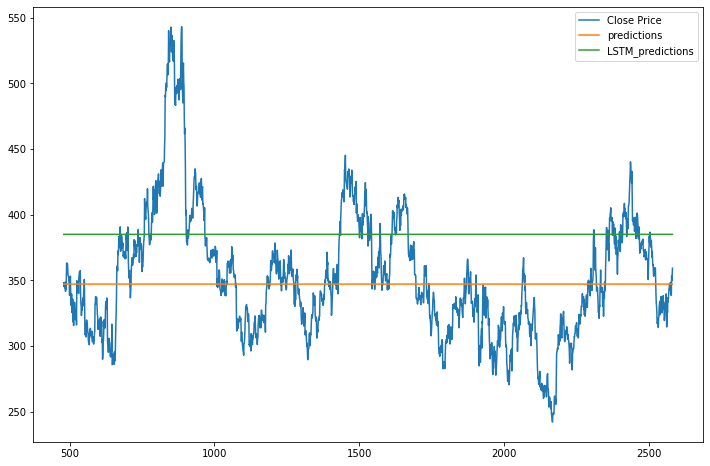

In [66]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot(figsize=(12,8))

In [67]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(15):
    
    #get predicted 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    forecast.append(current_pred)
    
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [68]:
forecast = scaler.inverse_transform(forecast)

In [69]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

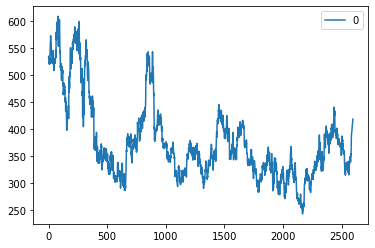

In [70]:
full_data.plot();

In [71]:
forecast

array([[385.11976095],
       [386.56404408],
       [388.60551637],
       [390.98097044],
       [393.56413804],
       [396.19943777],
       [398.82793765],
       [401.46885722],
       [404.03533508],
       [406.59317942],
       [409.00494176],
       [411.36675369],
       [413.72823454],
       [415.99589285],
       [418.21642766]])

In [72]:
full_data.tail(30)

,0
2567,336.600000
2568,340.300000
2569,344.050000
2570,344.500000
2571,347.600000
2572,342.700000
2573,346.050000
2574,348.500000
2575,339.200000
2576,338.850000
